### Create an appropriate visualization to show the distribution of profiles.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df= pd.read_pickle(r"C:\Users\Asus\Instacart Basket Analysis\02 Data\Prepared Data\df_final.pkl")

In [3]:
# Removing the limit to the amount of columns displayed by default: 
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_days,busiest_hours,max_orders,loyalty_flag,avg_spend,spender_flag,median_order_frequency,median_order_freq_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,exclusion_flag,age_group,income_group,department,dependant_group,family_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.0,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,Young Adults,Low income,beverages,Dependants,Female Married with No Dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least days,Average orders,10,New customer,6.0,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,Young Adults,Low income,beverages,Dependants,Female Married with No Dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least days,Most orders,10,New customer,6.0,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,Young Adults,Low income,beverages,Dependants,Female Married with No Dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least days,Average orders,10,New customer,6.0,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,Young Adults,Low income,beverages,Dependants,Female Married with No Dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least days,Most orders,10,New customer,6.0,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,Young Adults,Low income,beverages,Dependants,Female Married with No Dependants


In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'max_orders', 'loyalty_flag', 'avg_spend',
       'spender_flag', 'median_order_frequency', 'median_order_freq_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'region',
       'exclusion_flag', 'age_group', 'income_group', 'department',
       'dependant_group', 'family_profile'],
      dtype='object')

#### Distribution of Family Profiles

### Basic stats for Family Profile

In [6]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure
family_profile_agg = round(df.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']}),0)

In [7]:
family_profile_agg

order_id prices           
                                      count    min mean   max
family_profile                                               
Female Married with No Dependants  10795965    1.0  8.0  25.0
Female single with Dependants        723576    1.0  8.0  25.0
Female single with No Dependants    3858283    1.0  8.0  25.0
Male Married with Dependants       10947746    1.0  8.0  25.0
Male single with Dependants          757596    1.0  8.0  25.0
Male single with No Dependants      3881398    1.0  8.0  25.0

In [8]:
family_profile_agg.to_clipboard()

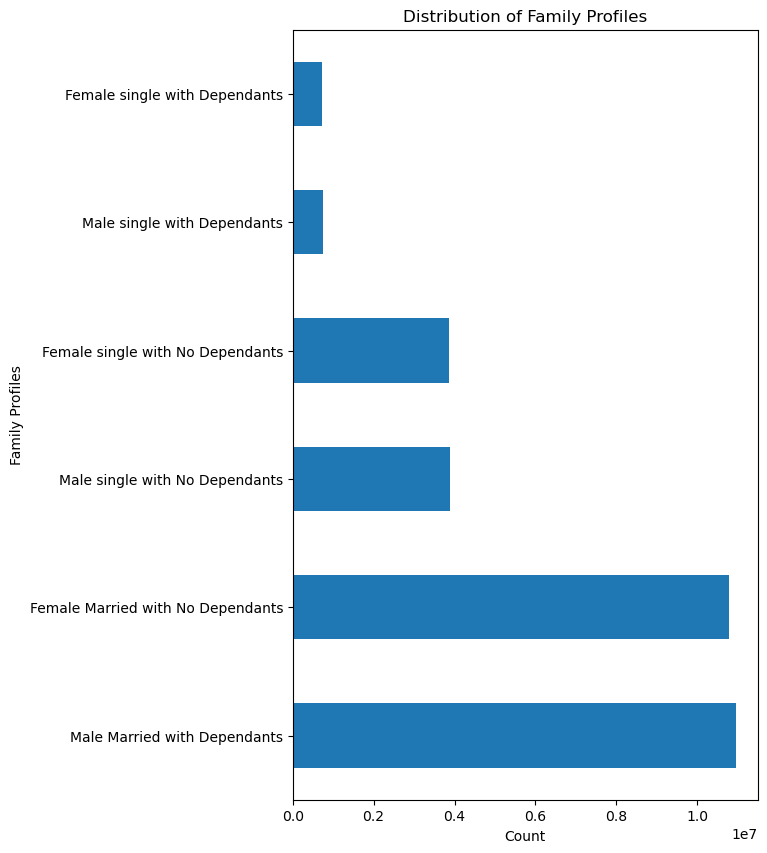

In [9]:
family_profile_distribution_bar = df['family_profile'].value_counts().plot.barh(figsize=(6,10))
plt.title('Distribution of Family Profiles')
plt.xlabel('Count')
plt.ylabel('Family Profiles')
plt.show()

In [10]:
# Exporting the bar outside Jupyter through figure.savefig() - family_profile_distribution_bar
family_profile_distribution_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\family_profile_distribution_bar_orders_dow.png", bbox_inches='tight')

### Comparing customers profiles with regions and departments

#### Family Profile Distribution by Region

In [11]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df['family_profile'],df['region'], dropna = False).sort_values(by="family_profile", ascending= False)

In [12]:
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
Male single with No Dependants,838992,690826,1345959,1005621
Male single with Dependants,163336,137743,267520,188997
Male Married with Dependants,2318824,1996450,3863511,2768961
Female single with No Dependants,829560,663656,1390238,974829
Female single with Dependants,156168,118687,269868,178853
Female Married with No Dependants,2344720,1857323,3783956,2809966


In [13]:
fam_region_profile.to_clipboard()

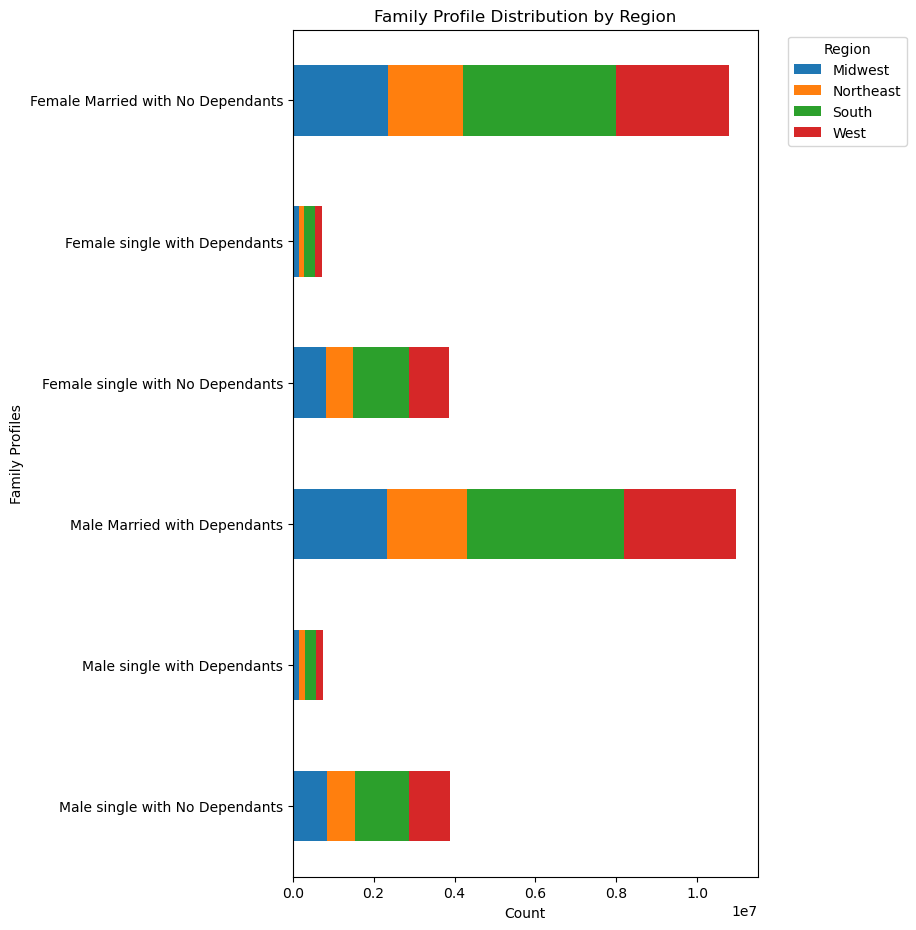

In [90]:
fam_region_profile_bar_stacked = fam_region_profile.plot.barh(stacked=True, figsize=(6,11))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Family Profiles')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [91]:
fam_region_profile_bar_stacked.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\fam_region_profile_bar_stacked_orders_dow.png", bbox_inches='tight')

### Family Profile Distribution by Department

In [16]:
# Comparing family_profile in different department - crosstab created 
fam_department_profile = pd.crosstab(df['family_profile'],df['department'], dropna = False)

In [17]:
fam_department_profile

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_profile,,,,,,,,,,,,,,,,,,,,,
Female Married with No Dependants,52459,140919,393456,899671,235315,11884,351369,1803780,349284,286808,739312,246999,88738,235817,22003,11809,622238,148344,31369,3155873,968518
Female single with Dependants,3784,9253,26351,58292,16347,777,22967,122983,23776,19528,49840,16642,5903,15759,1615,868,42388,10071,2525,210068,63839
Female single with No Dependants,18601,50469,139336,322421,82811,4081,124165,647898,126183,101763,263327,85291,31987,81908,8266,4478,219483,53509,11473,1135334,345499
Male Married with Dependants,46962,146764,392293,907782,235905,11934,361208,1828819,353049,291490,750078,248151,90398,240742,23513,12073,630718,149556,32751,3217420,976140
Male single with Dependants,4595,10128,27333,60815,16851,856,25510,127224,24343,20014,53153,16707,6491,16585,1702,947,43457,10130,2813,220471,67471
Male single with No Dependants,18226,52859,142059,322920,83621,3919,126855,646478,127199,102533,266021,86067,32474,83970,7669,4236,224421,52696,12129,1140107,344939


In [18]:
fam_department_profile.to_clipboard()

### Income (income_group) distribution stats

In [19]:
income_group_distribution_agg = round(df.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']}),2)

In [20]:
income_group_distribution_agg

order_id prices            
                 count    min  mean   max
income_group                             
High income    3894534    1.0  7.94  25.0
Low income     7741348    1.0  7.30  25.0
Mid income    19328682    1.0  7.96  25.0

Text(0, 0.5, 'Region')

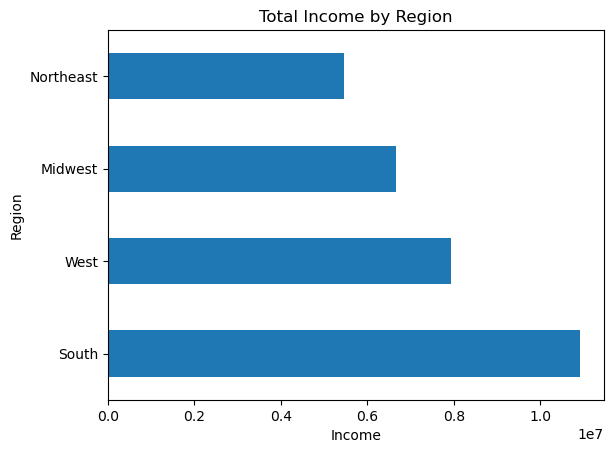

In [21]:
income_region_bar= df["region"].value_counts().plot.barh()
plt.title('Total Income by Region')
plt.xlabel('Income')
plt.ylabel('Region')

In [22]:
income_region_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\income_region_bar.png",bbox_inches='tight')

In [23]:
spender_region = pd.crosstab(df['spender_flag'],df['region'], dropna = False)

In [24]:
spender_region

region,Midwest,Northeast,South,West
spender_flag,,,,
High spender,184540,141866,288487,210432
Low spender,6467060,5322819,10632565,7716795


Text(0, 0.5, 'Count')

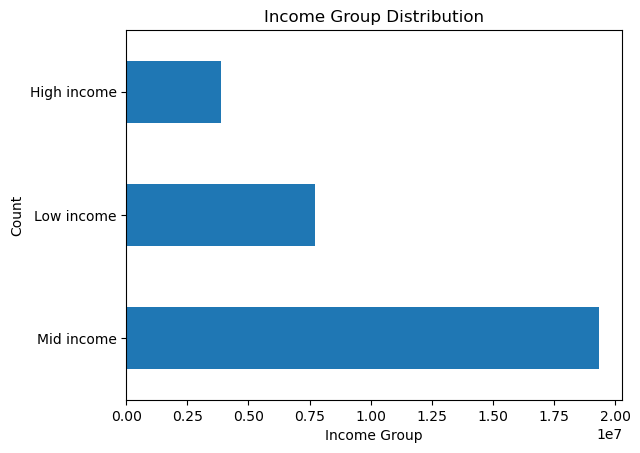

In [25]:
income_group_distribution = df['income_group'].value_counts().plot.barh()
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

In [26]:
income_group_distribution.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\income_group_distribution.png",bbox_inches='tight')

### Income (income_group) By Region

In [27]:
income_group_region = pd.crosstab(df['region'],df['income_group'], dropna = False)

In [28]:
income_group_region

income_group,High income,Low income,Mid income
region,,,
Midwest,837690,1636572,4177338
Northeast,677680,1367074,3419931
South,1369574,2747661,6803817
West,1009590,1990041,4927596


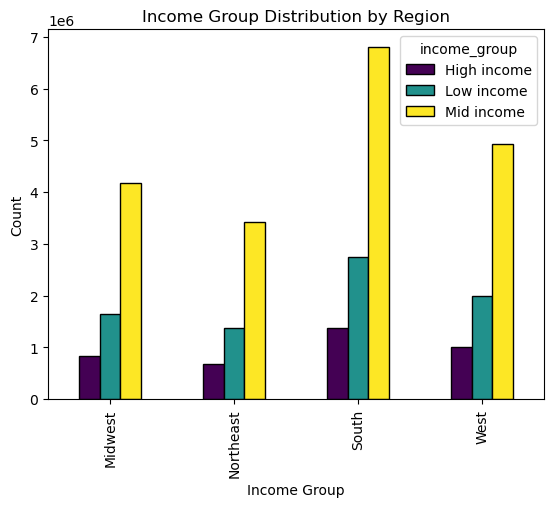

In [29]:
income_group_region_bar = income_group_region.plot(kind='bar', colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [30]:
income_group_region_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\income_group_region_bar_orders_dow.png",bbox_inches='tight')

### Income Group Distribution by Department

In [31]:
income_group_department = pd.crosstab(df['department'],df['income_group'], dropna = False)

In [32]:
income_group_department

income_group,High income,Low income,Mid income
department,,,
alcohol,24067,36825,83735
babies,53001,83835,273556
bakery,148430,264827,707571
beverages,313325,743205,1515371
breakfast,83418,187562,399870
bulk,3671,9400,20380
canned goods,132389,222477,657208
dairy eggs,659149,1229252,3288781
deli,125886,248154,629794


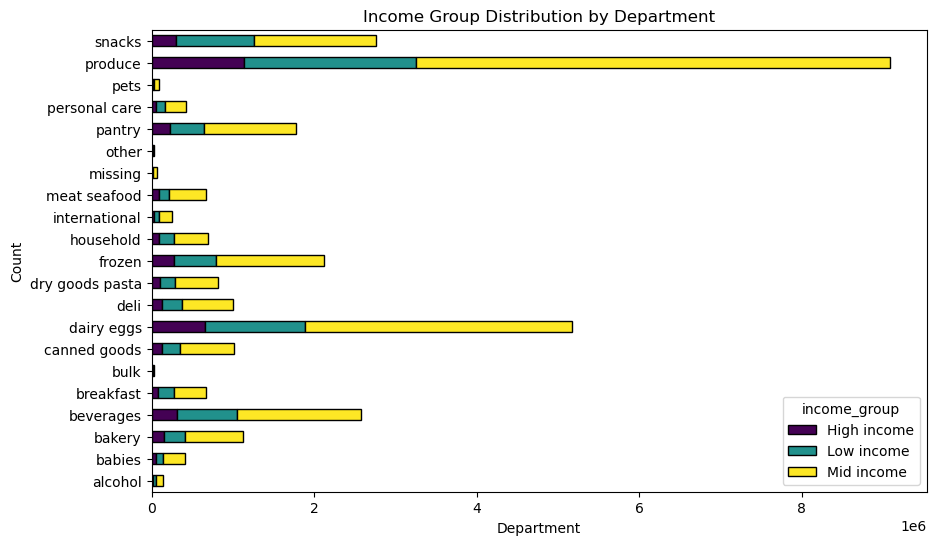

In [93]:
income_group_department_barh = income_group_department.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))

# Adding labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()

In [34]:
income_group_department_barh.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\income_group_department_barh.png",bbox_inches='tight')

### Distribution of Age Groups

In [35]:
age_group_agg = round(df.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']}),2)

In [36]:
age_group_agg

order_id prices            
                       count    min  mean   max
age_group                                      
Middle-aged Adults   9724950    1.0  7.79  25.0
Senior Adults       10574504    1.0  7.80  25.0
Young Adults        10665110    1.0  7.78  25.0

Text(0, 0.5, 'Count')

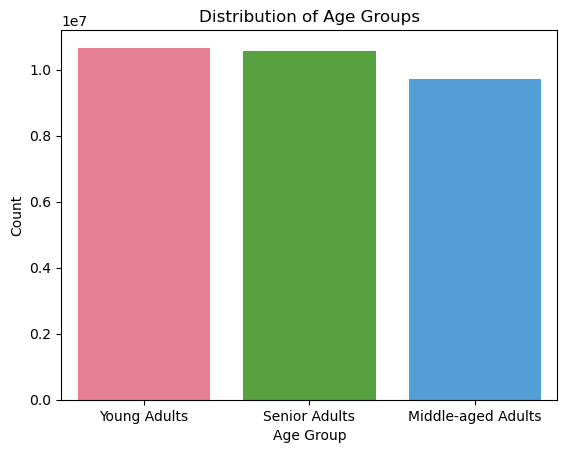

In [37]:
colors = sns.color_palette("husl", len(df['age_group'].unique()))
age_group_distribution_bar = sns.countplot(x='age_group', data=df, palette=colors)

# Adding labels and title
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [38]:
age_group_distribution_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\age_group_distribution_bar_orders_dow.png",bbox_inches='tight')

### Age Group by Region

In [39]:
age_group_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [40]:
age_group_region

age_group,Middle-aged Adults,Senior Adults,Young Adults
region,,,
Midwest,2136176,2252441,2262983
Northeast,1708719,1884229,1871737
South,3368364,3724423,3828265
West,2511691,2713411,2702125


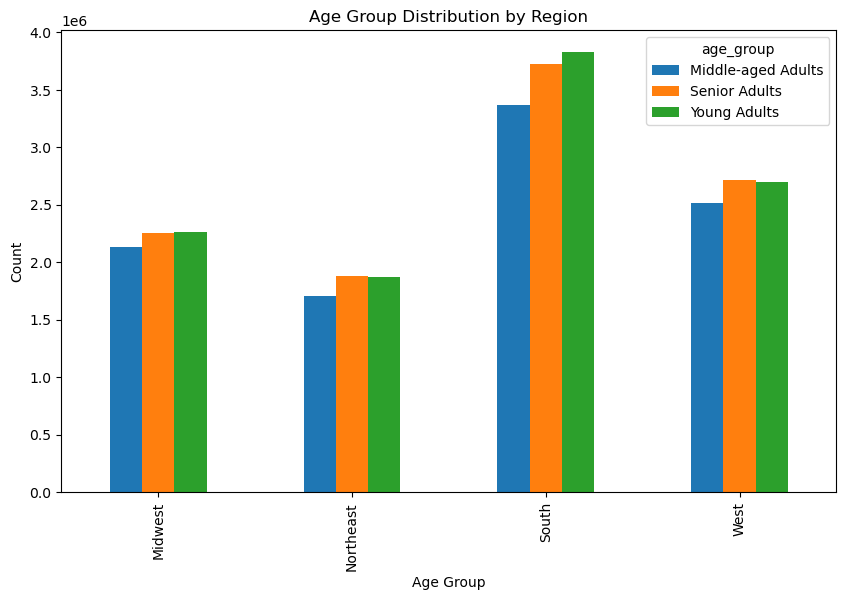

In [41]:
age_group_region_bar = age_group_region.plot(kind='bar', figsize=(10, 6))
# Adding labels and title
plt.title('Age Group Distribution by Region')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [42]:
age_group_region_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\age_group_region_bar_orders_dow.png", bbox_inches='tight')

### Age Group by Department

In [43]:
age_group_department = pd.crosstab(df['department'], df['age_group'], dropna = False)

In [44]:
age_group_department

age_group,Middle-aged Adults,Senior Adults,Young Adults
department,,,
alcohol,45375,47596,51656
babies,130198,138738,141456
bakery,352380,382446,386002
beverages,814059,883669,874173
breakfast,211160,227751,231939
bulk,10403,11424,11624
canned goods,317911,344447,349716
dairy eggs,1621367,1762512,1793303
deli,314654,343335,345845


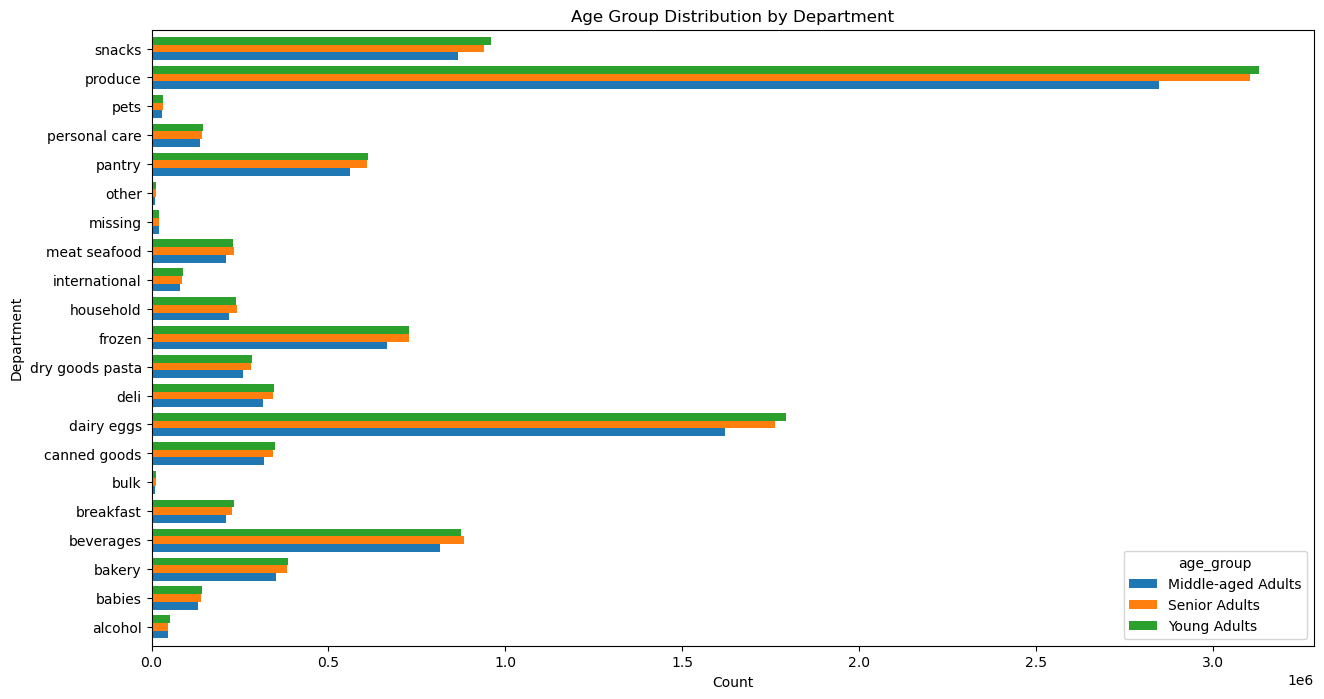

In [94]:
age_group_department_bar = age_group_department.plot(kind='barh', figsize=(15, 8), width=0.8)  # You can adjust the width as needed
plt.title('Age Group Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

In [96]:
age_group_department_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\age_group_department_bar.png", bbox_inches='tight')

### Most Requested Departments

In [47]:
department_stats = round(df.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']}),2)

In [48]:
department_stats

order_id prices             
                   count    min   mean   max
department                                  
alcohol           144627    1.0   8.15  15.0
babies            410392    1.0   7.63  15.0
bakery           1120828    1.0   7.86  15.0
beverages        2571901    1.0   7.68  15.0
breakfast         670850    1.0   8.03  14.9
bulk               33451    1.4   8.35  14.1
canned goods     1012074    1.0   7.55  15.0
dairy eggs       5177182    1.0   8.34  15.0
deli             1003834    1.0   7.78  15.0
dry goods pasta   822136    1.0   7.35  15.0
frozen           2121731    1.0   7.73  15.0
household         699857    1.0   7.38  15.0
international     255991    1.0   7.68  15.0
meat seafood      674781    8.0  16.30  25.0
missing            64768    1.0   8.66  15.0
other              34411    1.1   6.96  15.0
pantry           1782705    1.0   8.01  20.0
personal care     424306    1.0   8.00  15.0
pets               93060    1.0   7.89  15.0
produce          9079273    1.0   7.98  15.0
snacks           2766406    1.6   4.28   7.0

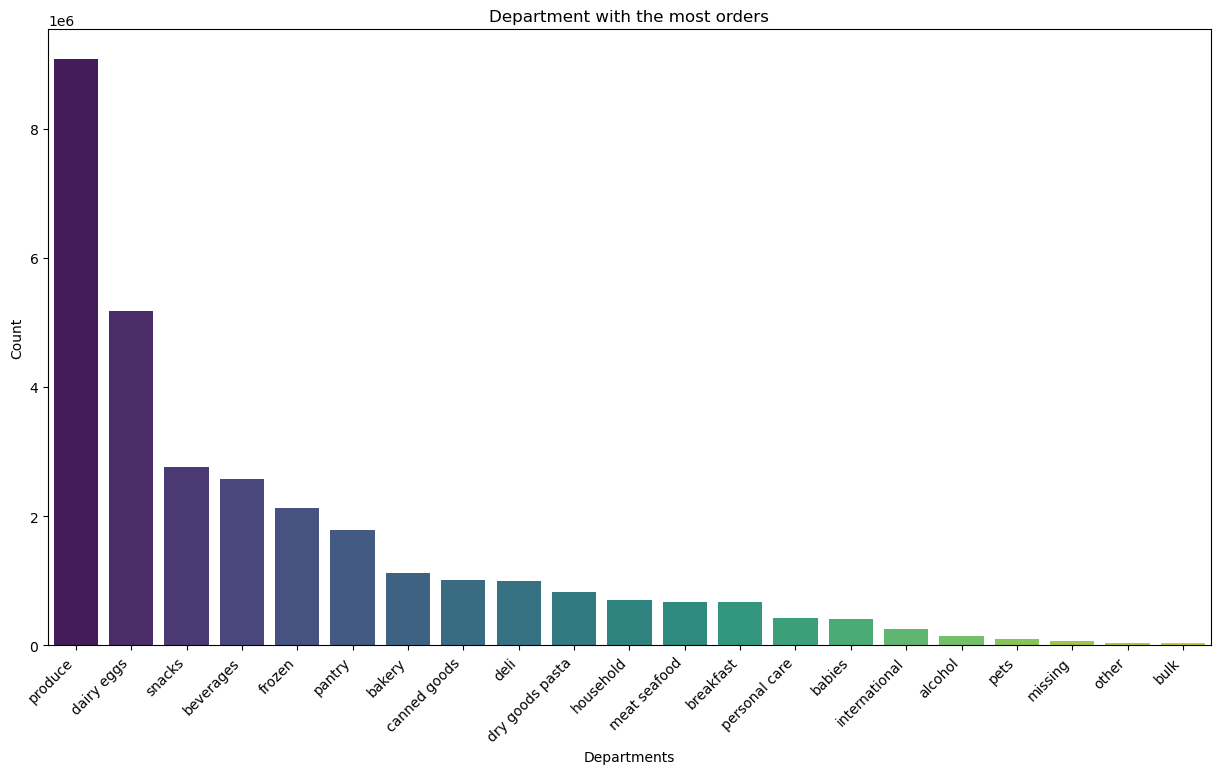

In [49]:
department_counts = df['department'].value_counts()
departments_distribution_bar = plt.figure(figsize=(15, 8))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title('Department with the most orders')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [50]:
departments_distribution_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\departments_distribution_bar_orders_dow.png", bbox_inches='tight')

### Departments by Region

In [51]:
depatment_region = pd.crosstab(df['department'],df['region'], dropna = False)

In [52]:
depatment_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,31428,25017,51428,36754
babies,87083,72712,148169,102428
bakery,240450,199300,392923,288155
beverages,548544,462929,909854,650574
breakfast,143101,117904,236226,173619
bulk,7239,5599,11870,8743
canned goods,217325,176936,357592,260221
dairy eggs,1110384,914616,1825122,1327060
deli,214270,178398,353814,257352


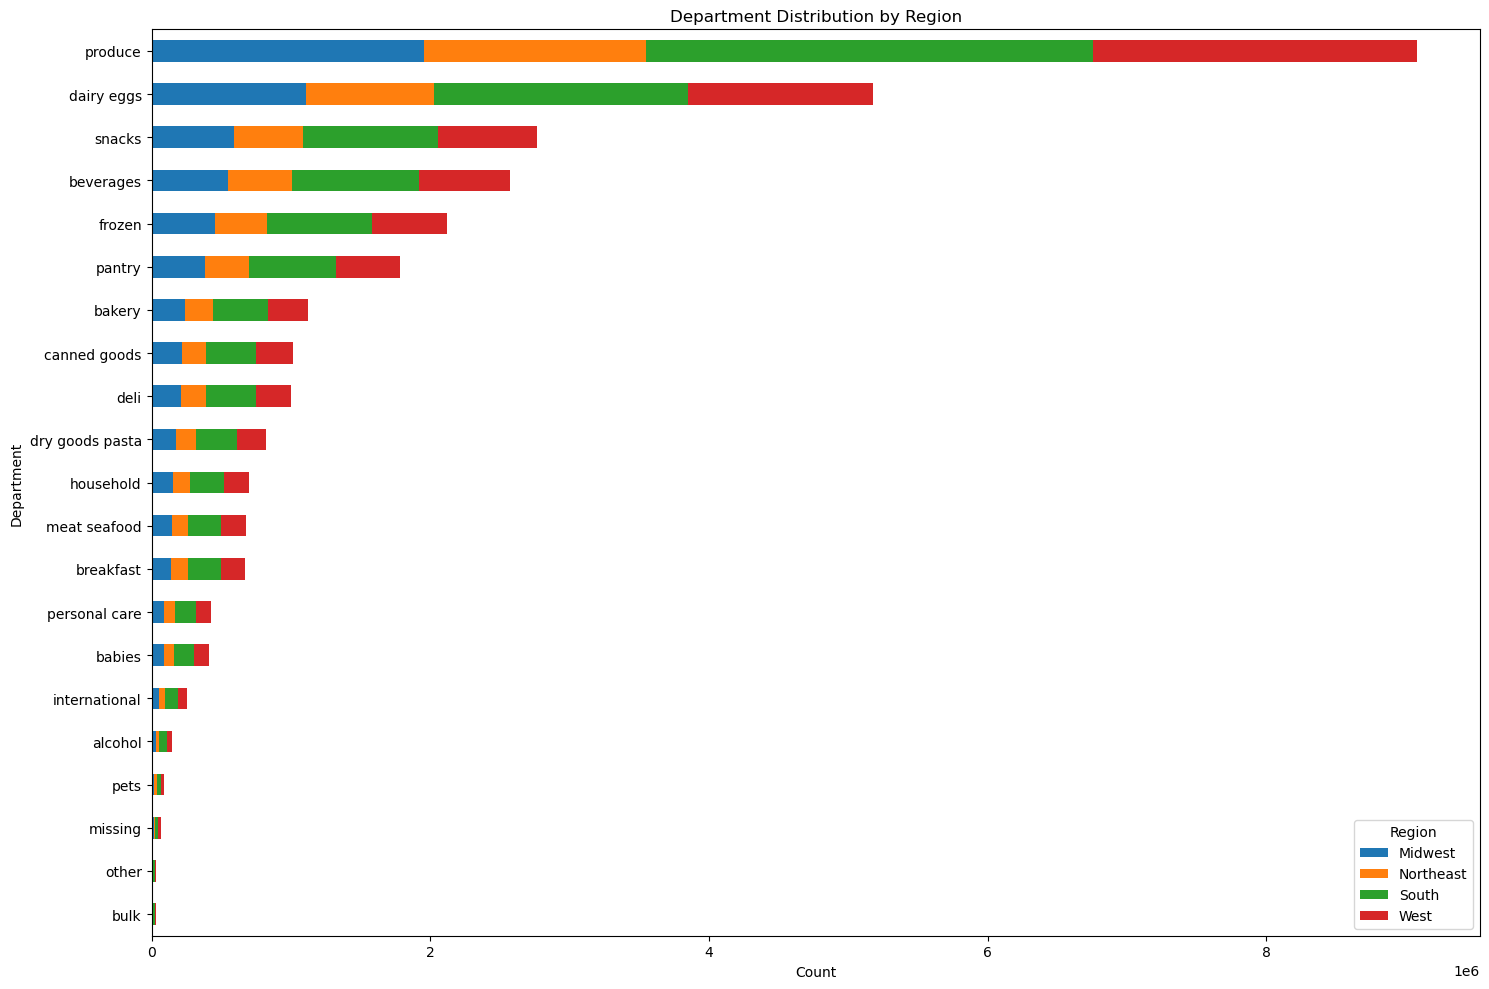

In [99]:
department_region_bar = depatment_region.sort_values(by='Midwest', ascending=True).plot(kind='barh', stacked=True, figsize=(15, 10))
plt.title('Department Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Region')
plt.tight_layout() 
plt.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\department_region_bar_orders_dow.png")
plt.show()

### Sales Team Key Questions - Answers

Busiest days of the week

In [54]:
df['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

In [55]:
#Knowing that 0 = Saturday, 1 = Sunday, 2=Monday, 3 = Tuesday, 4=  Wednesday, 5 = Thursday, 6  = Friday; I created a new column called 'week_days_orders'
df['week_days_orders'] = df['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [56]:
df['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: count, dtype: int64

In [57]:
busiest_week_days = df['week_days_orders'].value_counts(dropna = False)

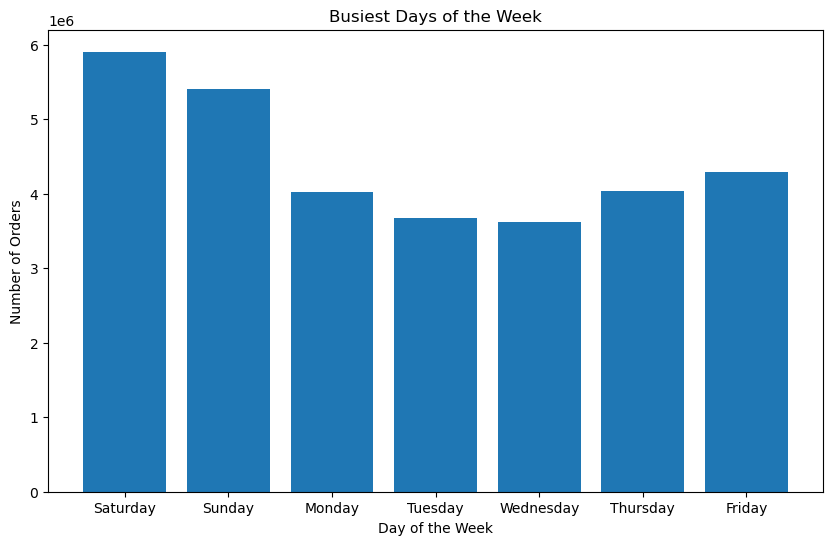

In [58]:
busiest_week_days_bar = df['week_days_orders'].value_counts()
# Sorting the days of the week in the correct order
days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
# Save the figure
plt.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\busiest_week_days_bar_orders_dow.png")
# Show the plot
plt.show()

### Busiest hours of the day

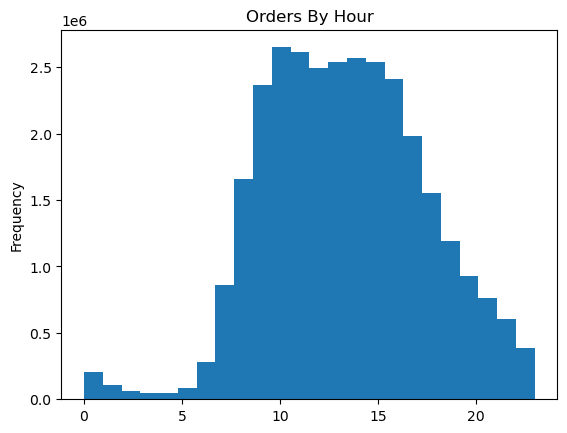

In [59]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

In [60]:
hist_order_hour_of_day.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\hist_order_hour_of_day_orders_dow.png", bbox_inches='tight')

### Hours during the day when people spend the more money

In [61]:
prices_by_hour = pd.crosstab(df['order_hour_of_day'],df['price_range_loc'], dropna = False)

In [62]:
prices_by_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,2644,64819,140579
1,1335,34033,74253
2,885,20622,44184
3,611,15029,33156
4,664,15711,34388
5,1018,26074,57326
6,3622,86902,190489
7,11274,267170,584769
8,21155,518313,1119642


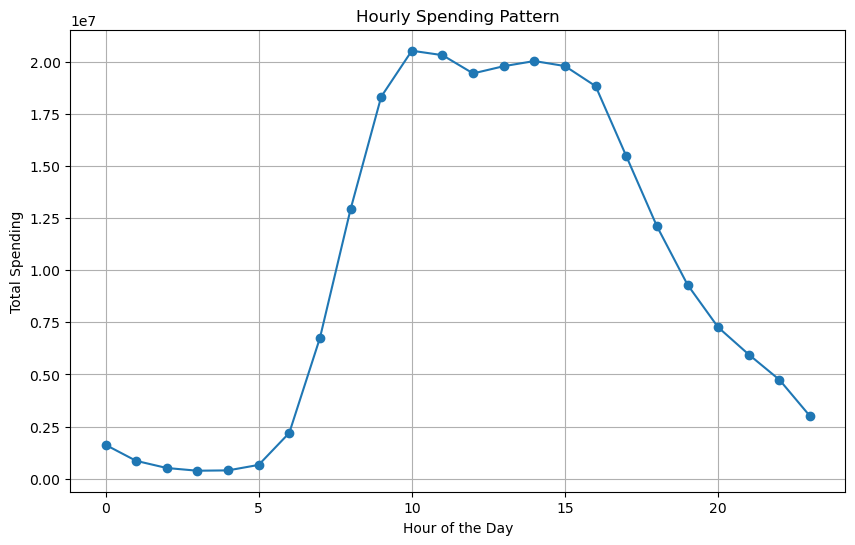

In [63]:
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)
# Save the plot
fig.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\hourly_spending_plot_orders_dow.png")

### Price Range Groupings
Price range grouping was created beforehand. The groupings are mid-range, low-range, and high-range under the "price_range_loc" column

In [64]:
df['prices'].describe()

count    3.095969e+07
mean     7.790590e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

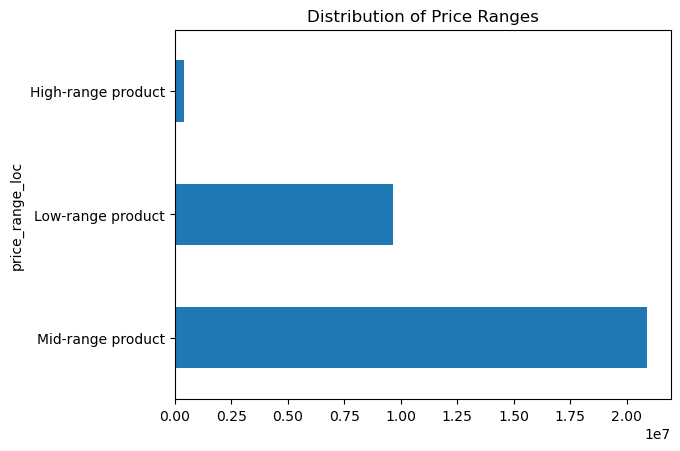

In [65]:
# Price range visual created from 'price_range_loc' grouping
price_range_bar = df['price_range_loc'].value_counts().plot.barh(title = 'Distribution of Price Ranges')

In [66]:
price_range_bar.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\price_range_bar.png", bbox_inches='tight')

In [67]:
### Income Distribution By Price Range

In [68]:
price_range_income = pd.crosstab(df['price_range_loc'],df['income_group'], dropna = False)

In [69]:
price_range_income

income_group,High income,Low income,Mid income
price_range_loc,,,
High-range product,57122,71574,269257
Low-range product,1161714,2771538,5741588
Mid-range product,2675698,4898236,13317837


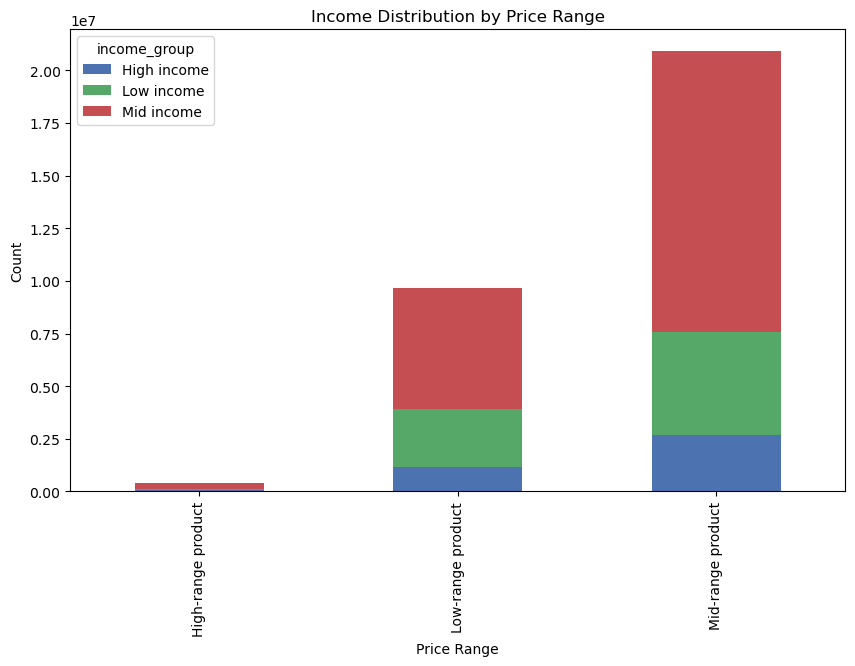

In [118]:
# Creating a stacked bar chart with custom colors
price_range_income.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Income Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\price_range_income_bar_orders_dow.png", bbox_inches='tight')

### Price Range & Family Profile Distribution

In [105]:
price_range_family_profile = pd.crosstab(df['family_profile'],df['price_range_loc'], dropna = False)

In [106]:
price_range_family_profile

price_range_loc,High-range product,Low-range product,Mid-range product
family_profile,,,
Female Married with No Dependants,139399,3375055,7281511
Female single with Dependants,9118,226195,488263
Female single with No Dependants,48021,1205689,2604573
Male Married with Dependants,142102,3418740,7386904
Male single with Dependants,9879,235612,512105
Male single with No Dependants,49434,1213549,2618415


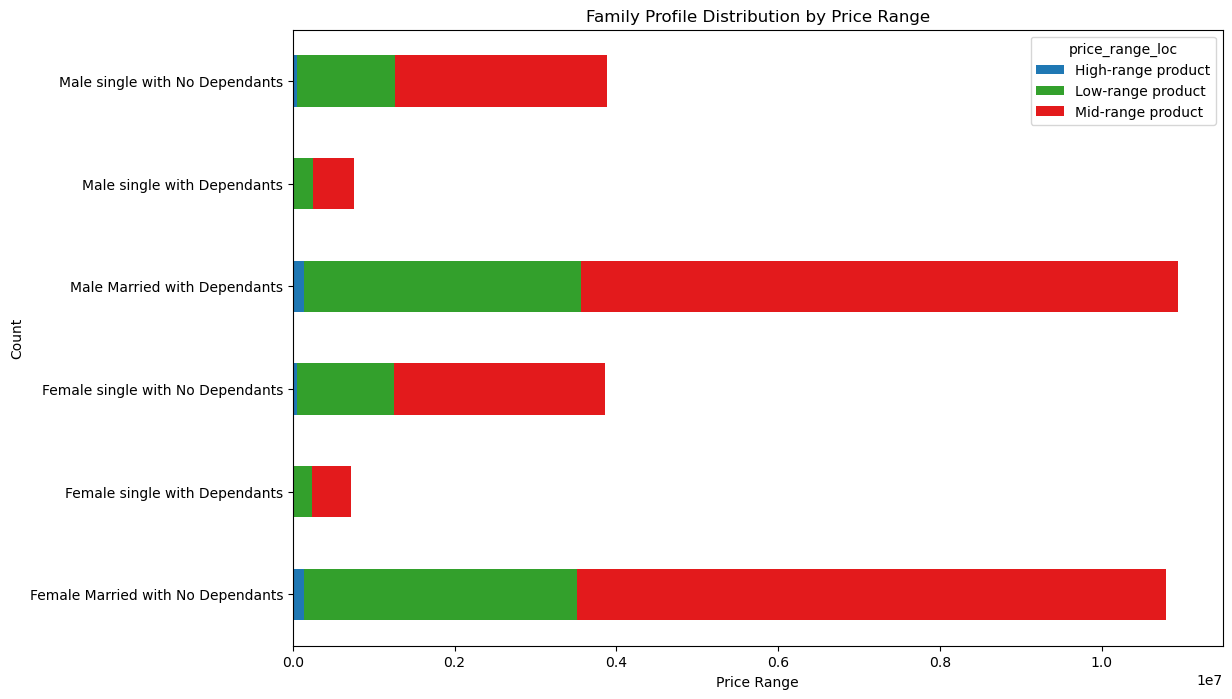

In [109]:
#Reorder columns for better visualization
price_range_family_profile = price_range_family_profile[['High-range product', 'Low-range product', 'Mid-range product']]
# Define custom colors
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3']
# Create a bar chart with custom colors
price_range_family_profile.plot(kind='barh', stacked=True, figsize=(12, 8), color=colors)
# Title and labels
plt.title('Family Profile Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\family_profile_bar_chart.png", bbox_inches='tight')

### Departments Frequency

Text(0.5, 1.0, 'Orders by Department')

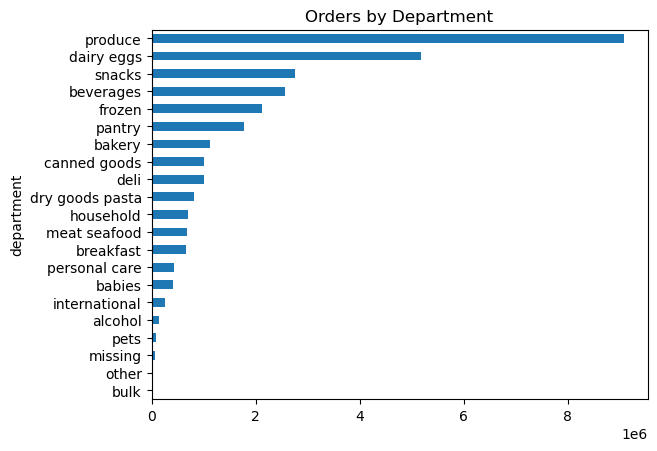

In [74]:
department_frequency = df['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")

In [75]:
department_frequency.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\department_frequency_bar_bar_orders_dow.png", bbox_inches='tight')

### User Distribution - Brand Loyalty

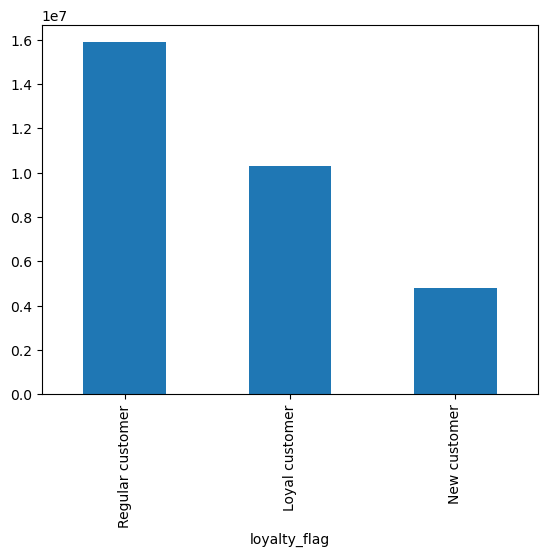

In [76]:
# "Regular Customers" make up most of the instacart users 
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

### Ordering Habits Based on Customer’s Loyalty Status

In [77]:
loyalty_flag_department = pd.crosstab(df['department'],df['loyalty_flag'], dropna = False)

In [78]:
loyalty_flag_department

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


### Ordering Habits Based On a Customer’s Region

In [79]:
loyalty_flag_region = pd.crosstab(df['region'],df['loyalty_flag'], dropna = False)

In [80]:
loyalty_flag_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2163738,1039618,3448244
Northeast,1841785,842156,2780744
South,3615880,1690807,5614365
West,2662690,1231114,4033423


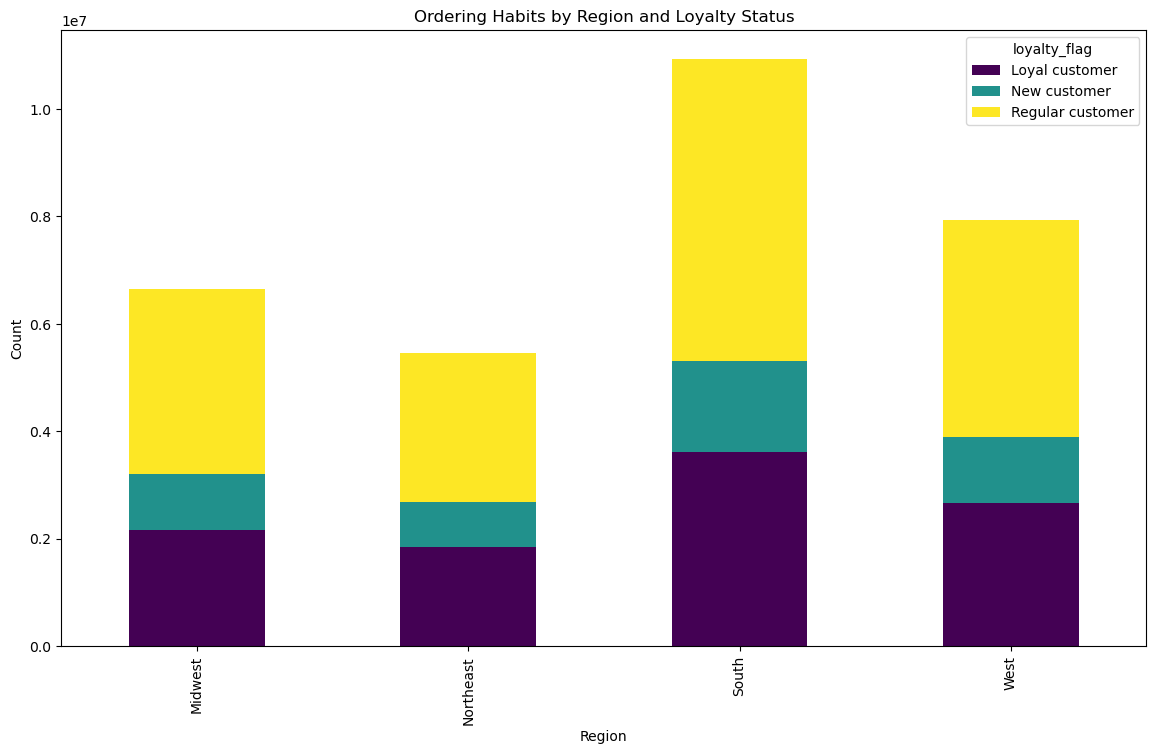

In [117]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna=False)
# Reorder columns for better visualization
loyalty_flag_region = loyalty_flag_region[['Loyal customer', 'New customer', 'Regular customer']]
# Create a stacked bar chart
loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')
# Save the figure
plt.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\loyalty_flag_region_bar.png", bbox_inches='tight')
# Show the plot
plt.show()

### Connection between age and family status in terms of ordering habits

In [82]:
age_family_profile = pd.crosstab(df['family_profile'],df['age_group'], dropna = False)

In [83]:
age_family_profile

age_group,Middle-aged Adults,Senior Adults,Young Adults
family_profile,,,
Female Married with No Dependants,3627847,3931591,3236527
Female single with Dependants,0,0,723576
Female single with No Dependants,1204748,1337129,1316406
Male Married with Dependants,3663268,3997642,3286836
Male single with Dependants,0,0,757596
Male single with No Dependants,1229087,1308142,1344169


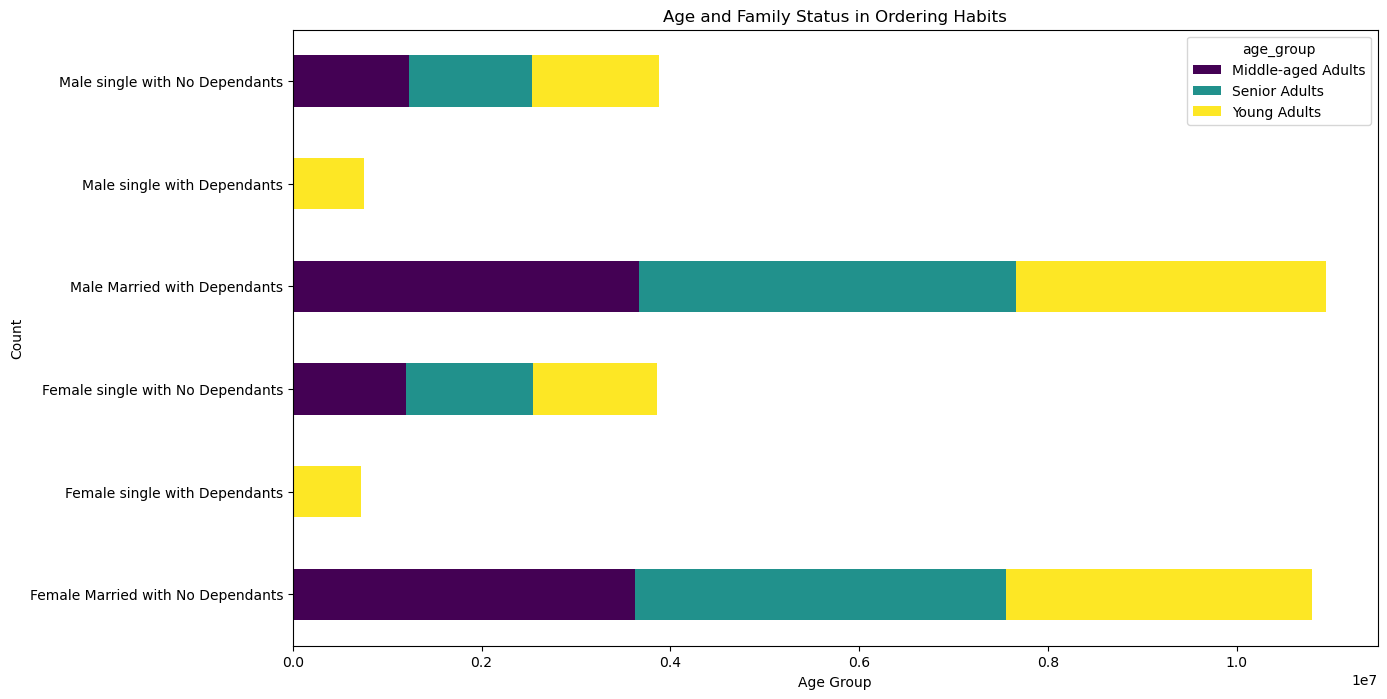

In [116]:
# Create a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df['family_profile'], df['age_group'], dropna=False)
# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['Middle-aged Adults', 'Senior Adults', 'Young Adults']]
# Create a stacked bar chart
age_family_crosstab.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Save the figure
plt.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\Age_Family_bar_chart.png", bbox_inches='tight')
# Show the plot
plt.show()

### Exploring whether there is a connection between age and spending power (income)

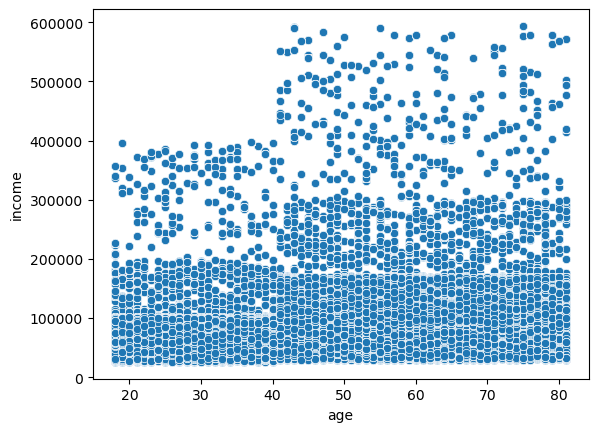

In [85]:
# There is a positive relationship between age and income. We can see that clearly on people of age of over 40
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df)

In [86]:
age_income_scatterplot.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\age_income__orders_dow_scatterplot.png", bbox_inches='tight')

### Most of the customers are married

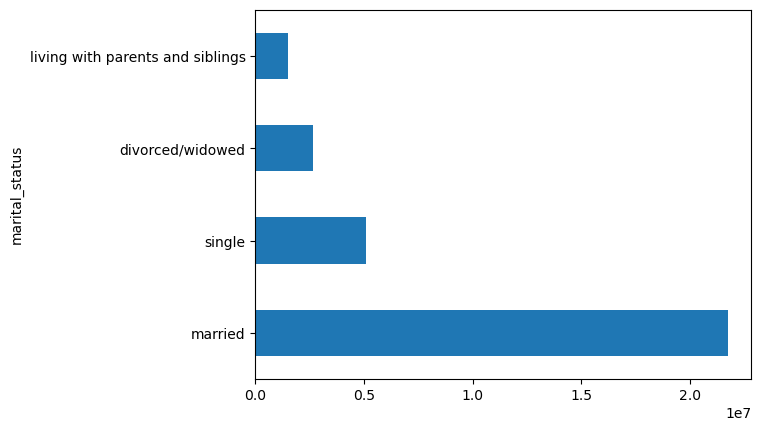

In [87]:
barh_marital = df['marital_status'].value_counts().plot.barh()

In [88]:
barh_marital.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\bar_marital__orders_dow.png", bbox_inches='tight')

In [119]:
# importing this final cleaned data set
df.to_pickle(r"C:\Users\Asus\Instacart Basket Analysis\02 Data\Prepared Data\Instakart.pkl")